# Student Performance Indicator 👨‍🎓

### Life cycle of Machine Learning project

* Understanding the Problem statement
* Data Collection 
* Data Check to perform
* Exploratory data Analysis
* Data Pre-processing
* Model Training
* Choose the best model

### 1. Problem Statement

* This project understands how the student's performance (test score) if affected by other variables such parental level of education, lunch and Test Preparation Course.

### 2. Data collection 

* Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* Data consists of 8 columns and 1000 rows

#### 2.1 Import Data and Required Packages
Import pandas, numpy , Matplotlib.pyplot, seaborn and Warnings library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**shape of dataset**

In [3]:
df.shape

(1000, 8)

### 2.2 Dataset Information

* Gender: sex of student -> (male/female)
* race/ethicity: ethicity of student -> (group A,B,C,D,E)
* Parental level of education: parent's final education -> (Bachelor's degree, some college, master's degree, associalte's degree, high school)
* lunch: having lunch before test (Standard or free/reduced)
* test Preparation Course: Completed or not completed before test
* math score
* Reading Score
* writing Score

#### 3. Data Checks to perform

* Check Missing values
* Check Duplicates
* Check datatypes
* Check the number of unique values of each column
* Check Statistics of dataset
* Check Various categories present in the different categorical column

**3.1 Check missing values**

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values

**3.2 Check duplicates**

In [6]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

**3.3 check datatypes**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**3.4 Checking the number of unique values in each column**

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**3.5 check statistics of dataset**

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

* From above description of numerical data, all means are very close to each other between 66 and 68.05
* All Standard deviations are also close - between 14.6 adn 15.19
* While there is a minimum score 0 for math for writing minimum is much higher = 10 and for reading myet higher = 17

**3.7 Exploring the data**

In [15]:
print("Number of unique values in each column")

for i in df.columns:
    print(f"for {i}: ")
    print(i, df[i].value_counts(), "\n")

Number of unique values in each column
for gender: 
gender gender
female    518
male      482
Name: count, dtype: int64 

for race_ethnicity: 
race_ethnicity race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

for parental_level_of_education: 
parental_level_of_education parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

for lunch: 
lunch lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

for test_preparation_course: 
test_preparation_course test_preparation_course
none         642
completed    358
Name: count, dtype: int64 

for math_score: 
math_score math_score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: count, Length: 81, dtype: int64 

for reading_score: 
reading_score readin

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print("we have {} numerical Features: {}".format(len(numerical_features), numerical_features))
print("we have {} categorical Features: {}".format(len(categorical_features), categorical_features))

we have 3 numerical Features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


**3.8 Adding columns for `Total Score` and `Average`**

In [19]:
df["total_marks"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = df["total_marks"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
reading_full = df[df["reading_score"]==100]['average'].count()
writing_full = df[df["writing_score"]==100]['average'].count()
math_full = df[df["math_score"]==100]['average'].count()

print(f"Number of Student with full marks in Maths: {math_full}")
print(f"Number of Student with full marks in Reading: {reading_full}")
print(f"Number of Student with full marks in Writing: {writing_full}")

Number of Student with full marks in Maths: 7
Number of Student with full marks in Reading: 17
Number of Student with full marks in Writing: 14


In [25]:
reading_less_20 = df[df["reading_score"]<=20]['average'].count()
writing_less_20 = df[df["writing_score"]<=20]['average'].count()
math_less_20 = df[df["math_score"]<=20]['average'].count()

print(f"Number of Student with less than 20 marks in Maths: {math_less_20}")
print(f"Number of Student with less than 20 marks in Reading: {reading_less_20}")
print(f"Number of Student with less than 20 marks in Writing: {writing_less_20}")

Number of Student with less than 20 marks in Maths: 4
Number of Student with less than 20 marks in Reading: 1
Number of Student with less than 20 marks in Writing: 3


### Insights

* From above value we get studetns have perforemd the worst in Maths
* Best performance is in reading section

### 4. Explorating Data (visualization)

**4.1 Visualizing average score distribution to make some conclusions**

* Histograms
* Kernel Distribution Estimate (KDE) plot

**4.1.1 Histogram & KDE**

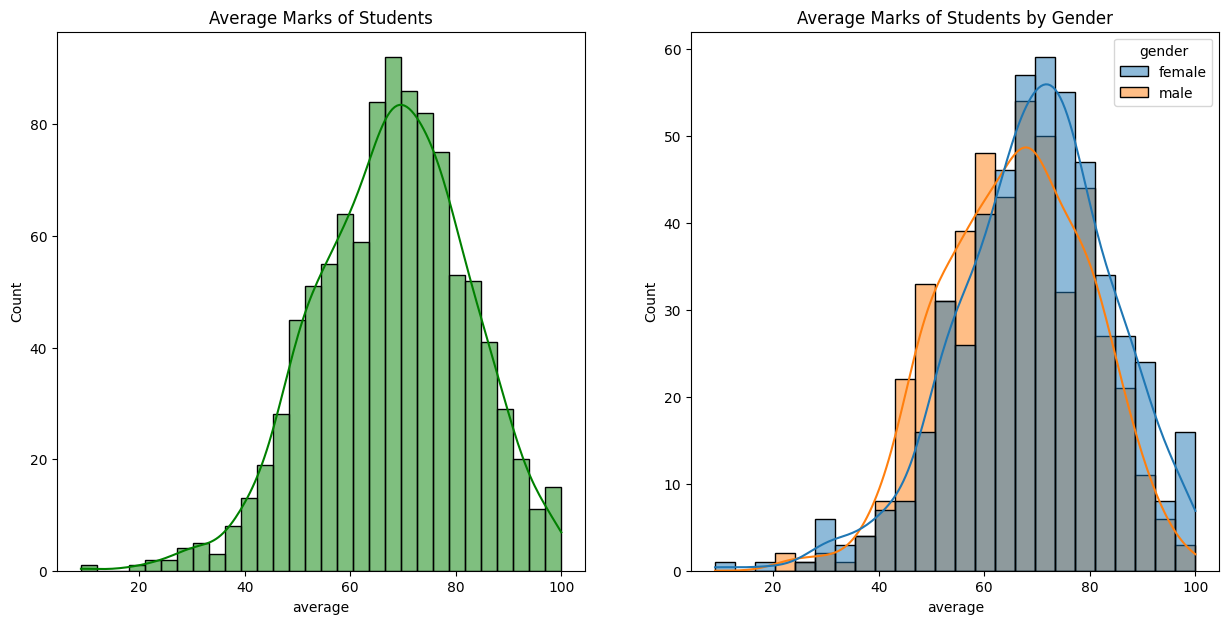

In [31]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
ax[0].set_title("Average Marks of Students")
sns.histplot(data = df , x = "average", kde=True, bins = 30,color = 'g')
plt.subplot(122)
ax[1].set_title("Average Marks of Students by Gender")
sns.histplot(data = df, x='average', kde = True, hue = 'gender')
plt.show()

**Insights**

- The average score of students is around 67.
- female students have a higher average score than male students.

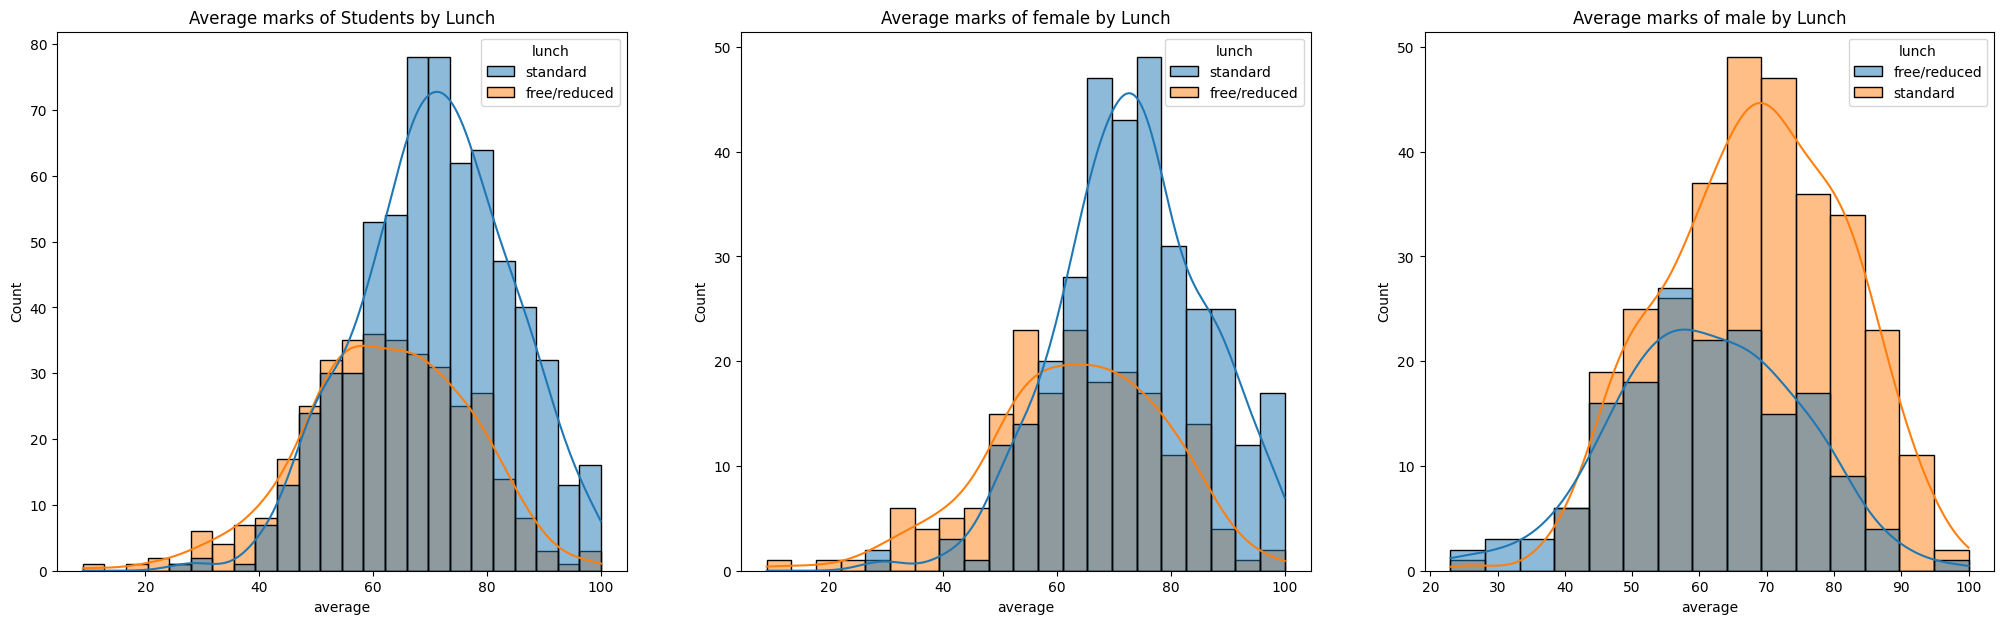

In [34]:
fig , ax = plt.subplots(1,3,figsize = (25,7))
plt.subplot(131)
ax[0].set_title("Average marks of Students by Lunch")
sns.histplot(data = df, x = "average", kde = True, hue = "lunch")# kde = kernel density estimation is True means it will show the density of the data
plt.subplot(132)
ax[1].set_title("Average marks of female by Lunch")
sns.histplot(data = df[df.gender =='female'], x = "average",kde = True,  hue = "lunch")
plt.subplot(133)
ax[2].set_title("Average marks of male by Lunch")
sns.histplot(data = df[df.gender =="male"], x= 'average', kde =True, hue = "lunch");

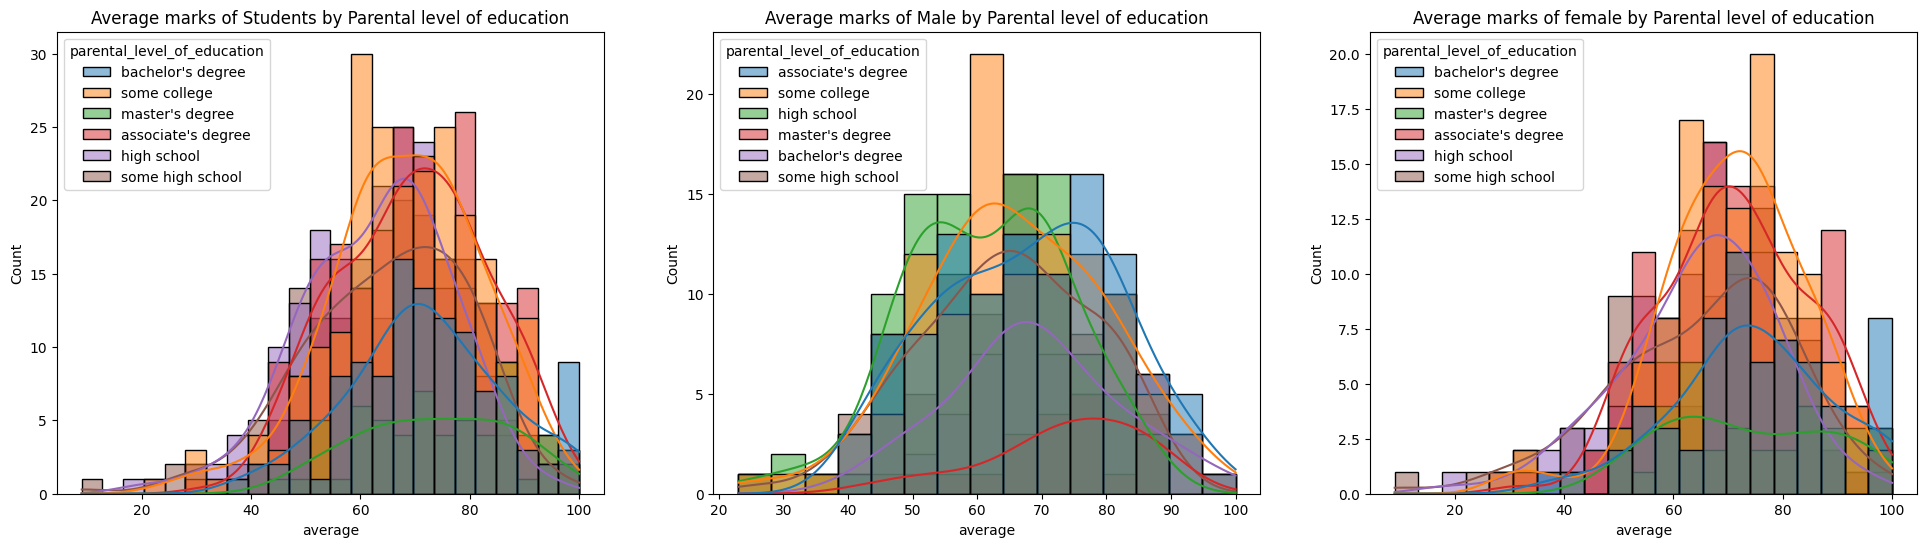

In [36]:
fig, ax = plt.subplots(1,3,figsize=(24,6))
plt.subplot(131)
ax[0].set_title("Average marks of Students by Parental level of education")
ax[0] = sns.histplot(data = df, x = 'average', kde = True, hue = "parental_level_of_education")
plt.subplot(132)
ax[1].set_title("Average marks of Male by Parental level of education")
ax[1] = sns.histplot(data = df[df.gender =="male"], x = 'average', kde = True, hue = "parental_level_of_education")
plt.subplot(133)
ax[2].set_title("Average marks of female by Parental level of education")
ax[2] = sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = "parental_level_of_education")

### Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

**4.2 Maximum score of students in each subject**

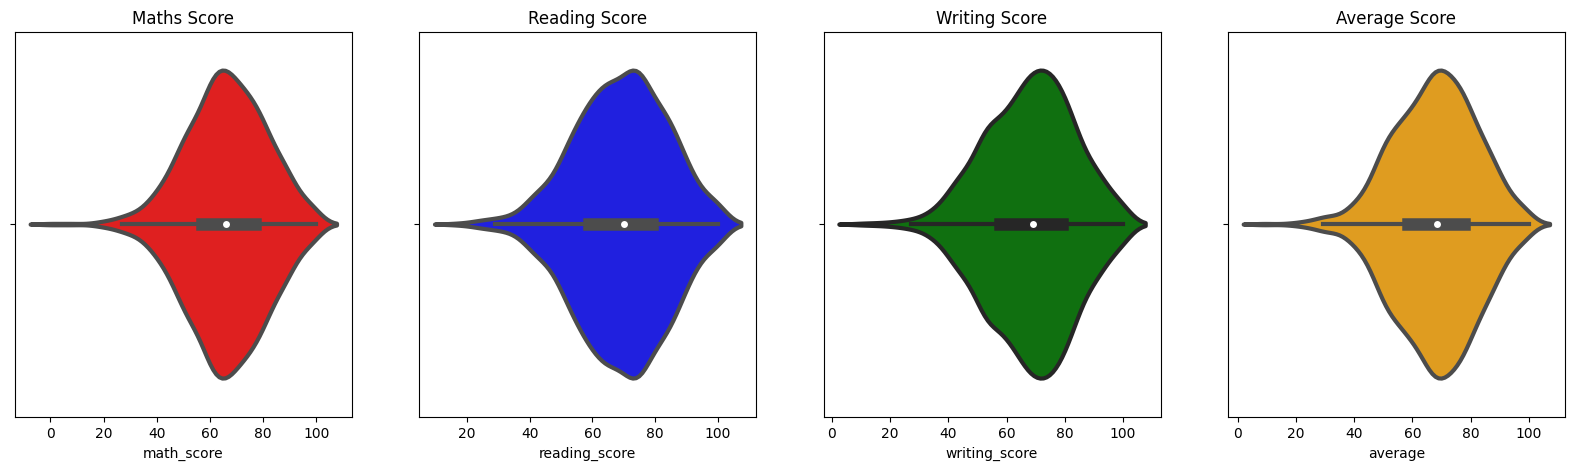

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.title("Maths Score")
sns.violinplot(data = df, x = "math_score", color = 'red', linewidth = 3)
plt.subplot(142)
plt.title("Reading Score")
sns.violinplot(data = df, x = "reading_score", color = 'blue', linewidth = 3)
plt.subplot(143)
plt.title("Writing Score")
sns.violinplot(data = df, x = "writing_score", color = 'green', linewidth = 3)
plt.subplot(144)
plt.title("Average Score")
sns.violinplot(data = df, x = "average", color = 'orange', linewidth = 3);
plt.show()

### Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

**4.3 Multivairate Analysis using pieplot**

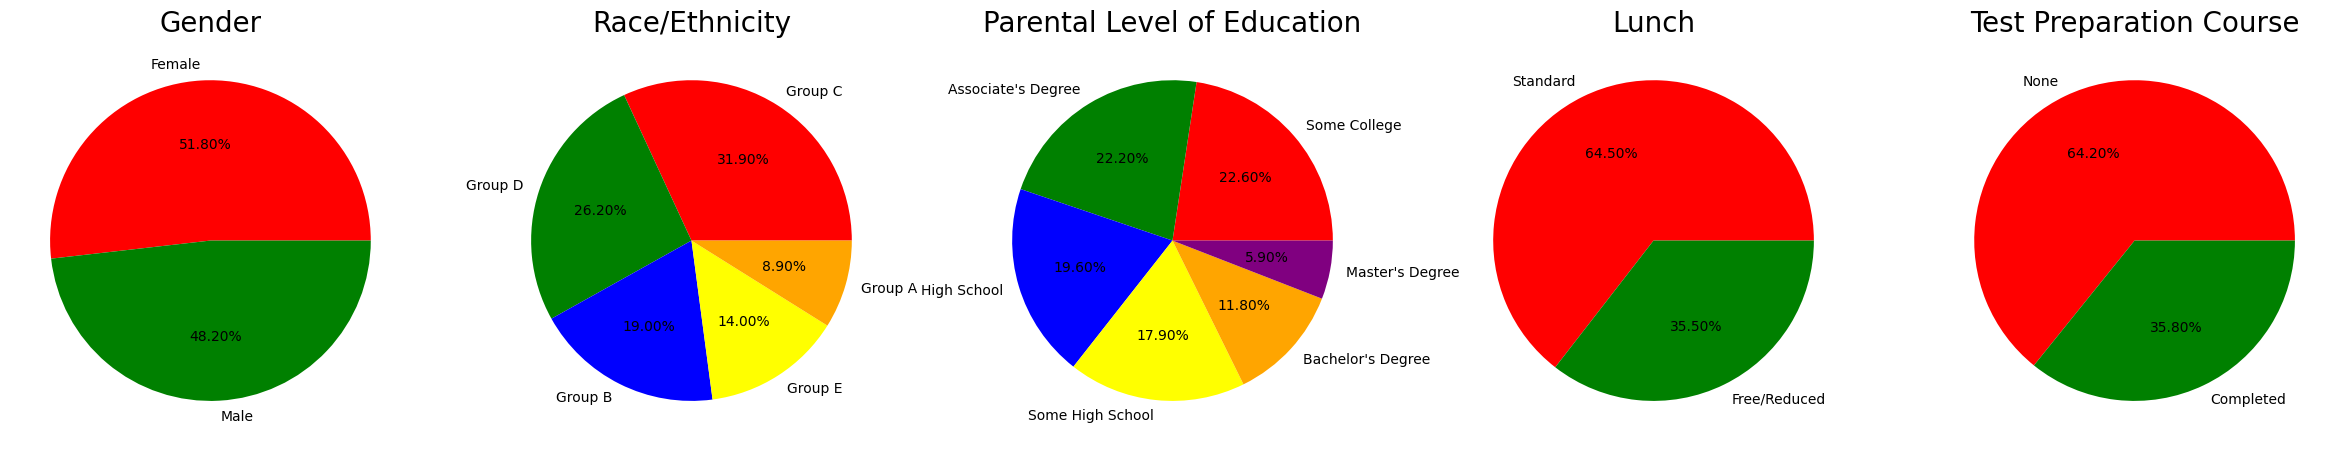

In [45]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size = df.gender.value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis(False)

plt.subplot(1,5,2)
size = df.race_ethnicity.value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'yellow', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title("Race/Ethnicity", fontsize = 20)
plt.axis(False)

plt.subplot(1,5,3)
size = df.parental_level_of_education.value_counts()
labels = 'Some College', "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title("Parental Level of Education", fontsize = 20)
plt.axis(False)

plt.subplot(1,5,4)
size = df.lunch.value_counts()
labels = 'Standard', 'Free/Reduced'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title("Lunch", fontsize = 20)
plt.axis(False)

plt.subplot(1,5,5)
size = df.test_preparation_course.value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title("Test Preparation Course", fontsize = 20)
plt.axis(False)

plt.show()

### Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

**4.4 Feature Wise Analysis(Visualization)**

**4.4.1. Gender**

* How distribution of Gender? 
* is Gender has any impact on the score?

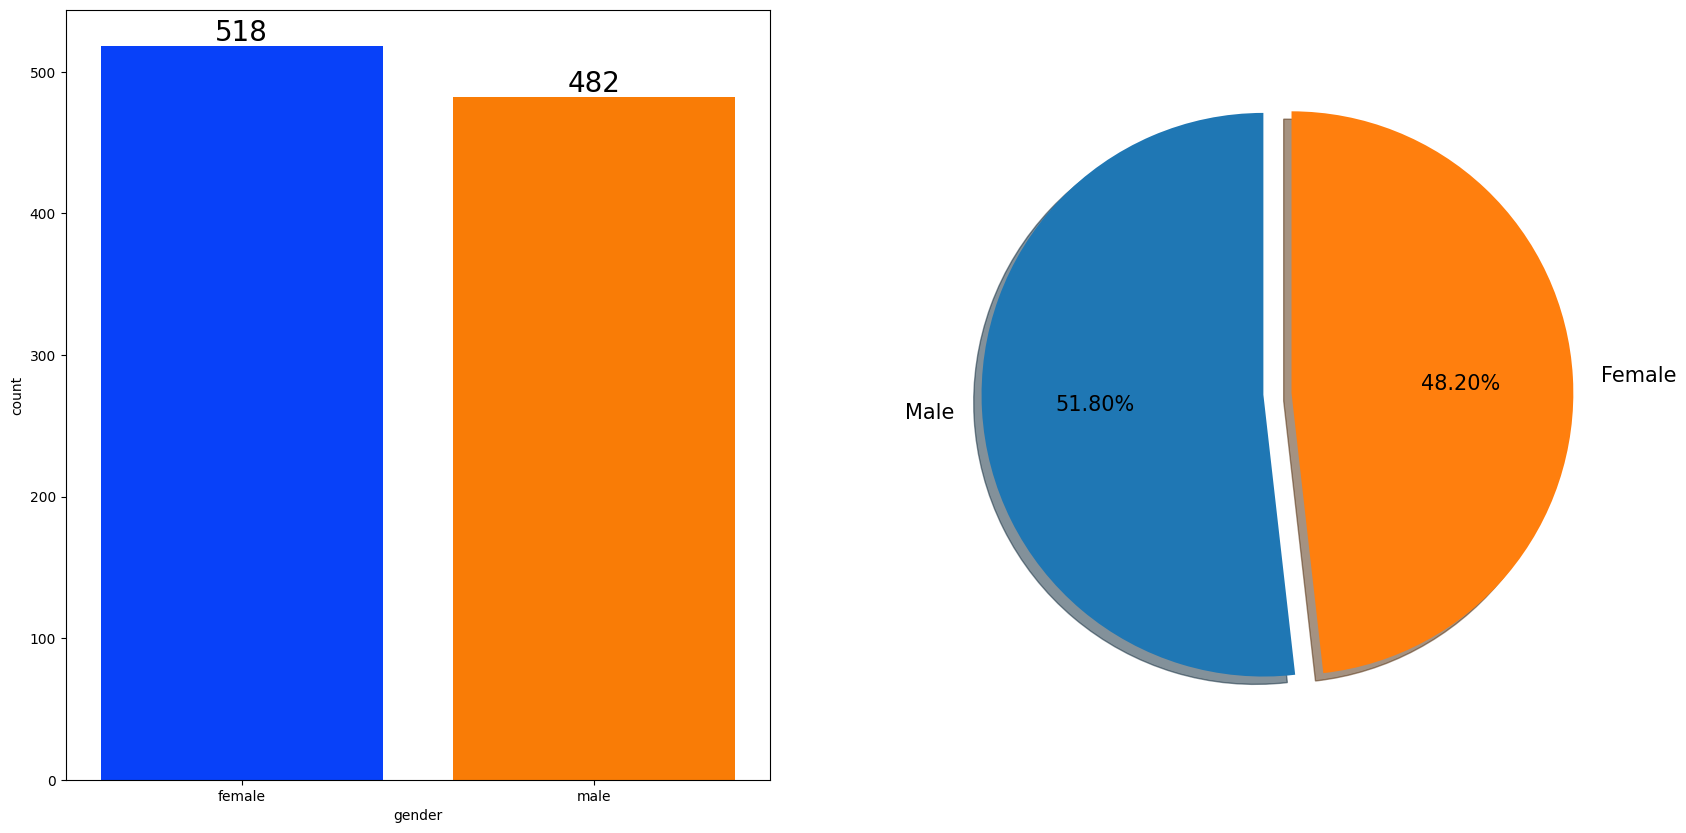

In [60]:
# Univariate Analysis (How is the Distribution of the Gender? )\
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 20)

plt.pie(x=df['gender'].value_counts(), labels = ["Male", "Female"], explode = [0,0.1], autopct = '%.2f%%', shadow = True, startangle = 90, textprops = {'fontsize': 15})
plt.show()


In [65]:
# Bivariate Analysis (is Gender has any impact on the Student's performance?)

gender_group = df.groupby('gender')[["average","math_score"]].mean()
gender_group

,average,math_score
gender,,
female,69.569498,63.633205
male,65.837483,68.728216


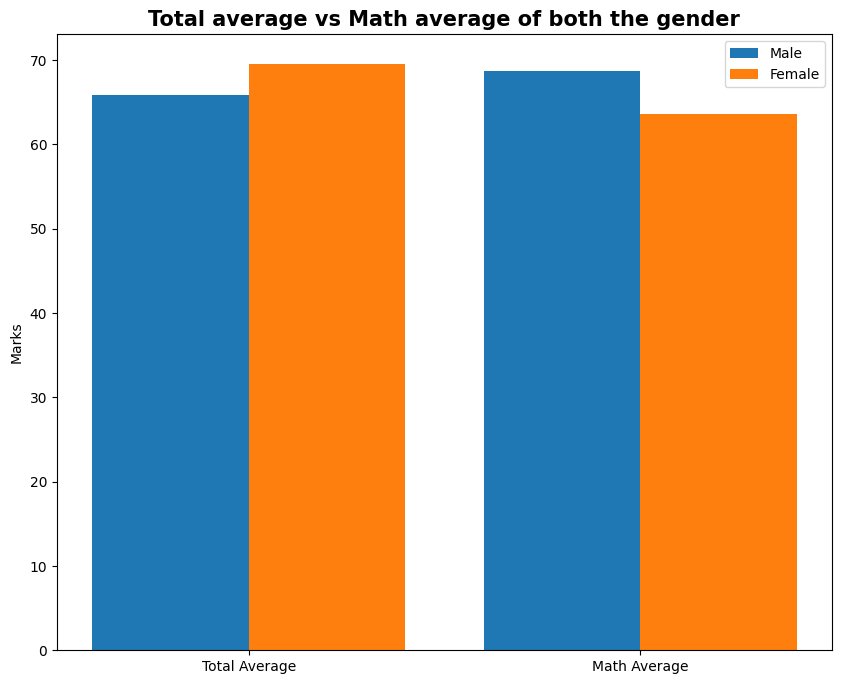

In [66]:
plt.figure(figsize=(10,8))

X = ["Total Average", "Math Average"]

female_score = [gender_group['average'][0], gender_group["math_score"][0]]
male_score = [gender_group['average'][1], gender_group["math_score"][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_score, 0.4,label = "Female")

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average of both the gender", fontweight = 'bold', fontsize = 15)
plt.legend()
plt.show()

### Insights
* On an average females have a better overall score than men.
whereas males have scored higher in Maths.

**4.4.2 Race/Ethnicity column**

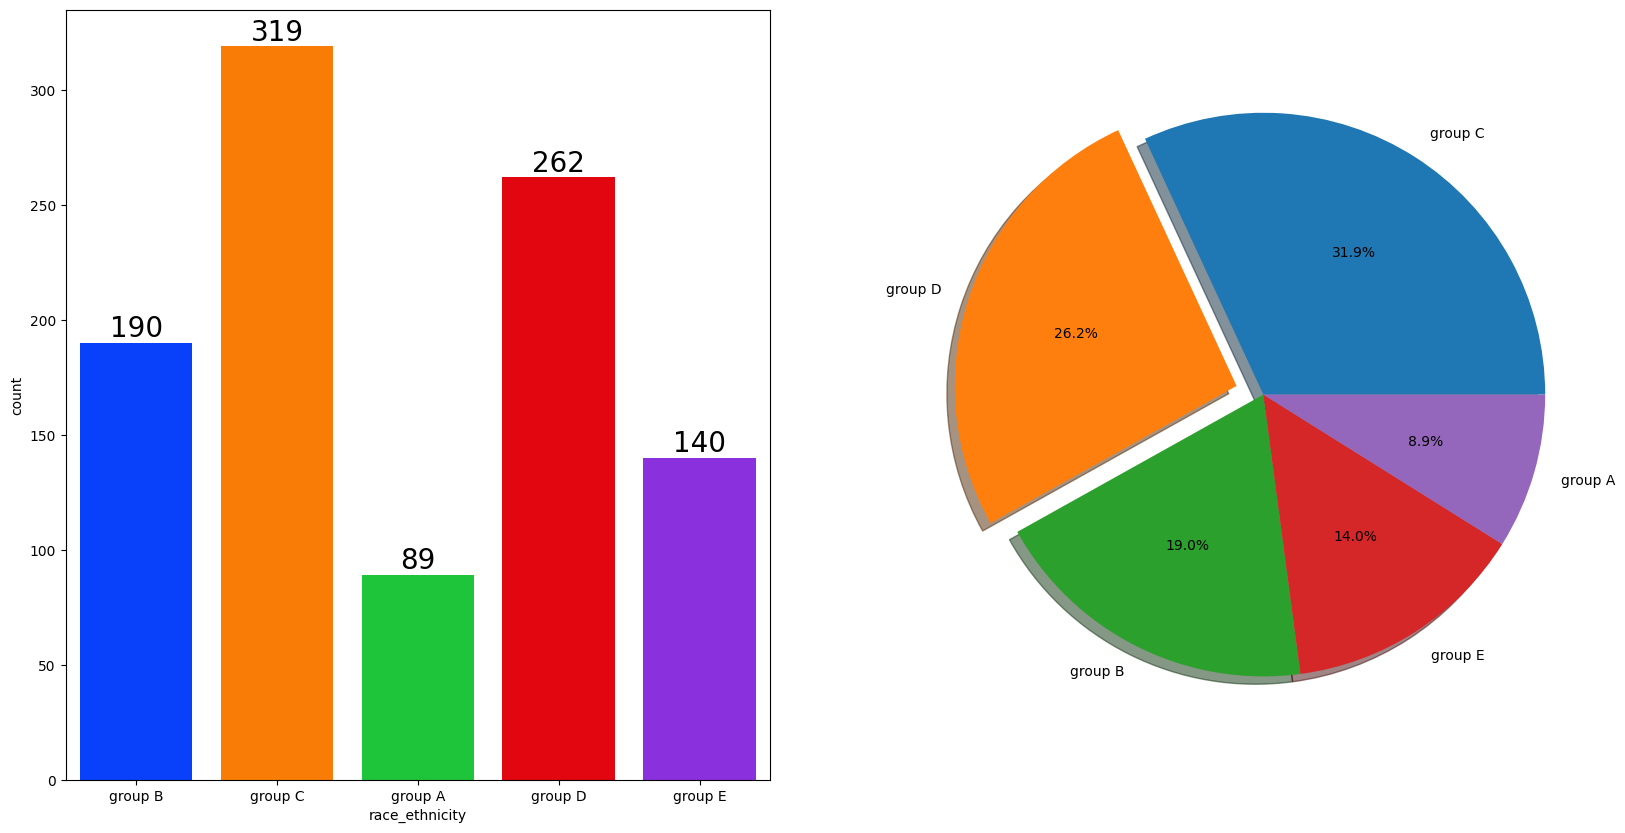

In [69]:
# Univariate Analysis
fig, ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x=df['race_ethnicity'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 20)

plt.pie(x = df["race_ethnicity"].value_counts(), labels = df["race_ethnicity"].value_counts().index, explode = [0,0.1,0,0,0], autopct= "%1.1f%%", shadow=True)
plt.show()

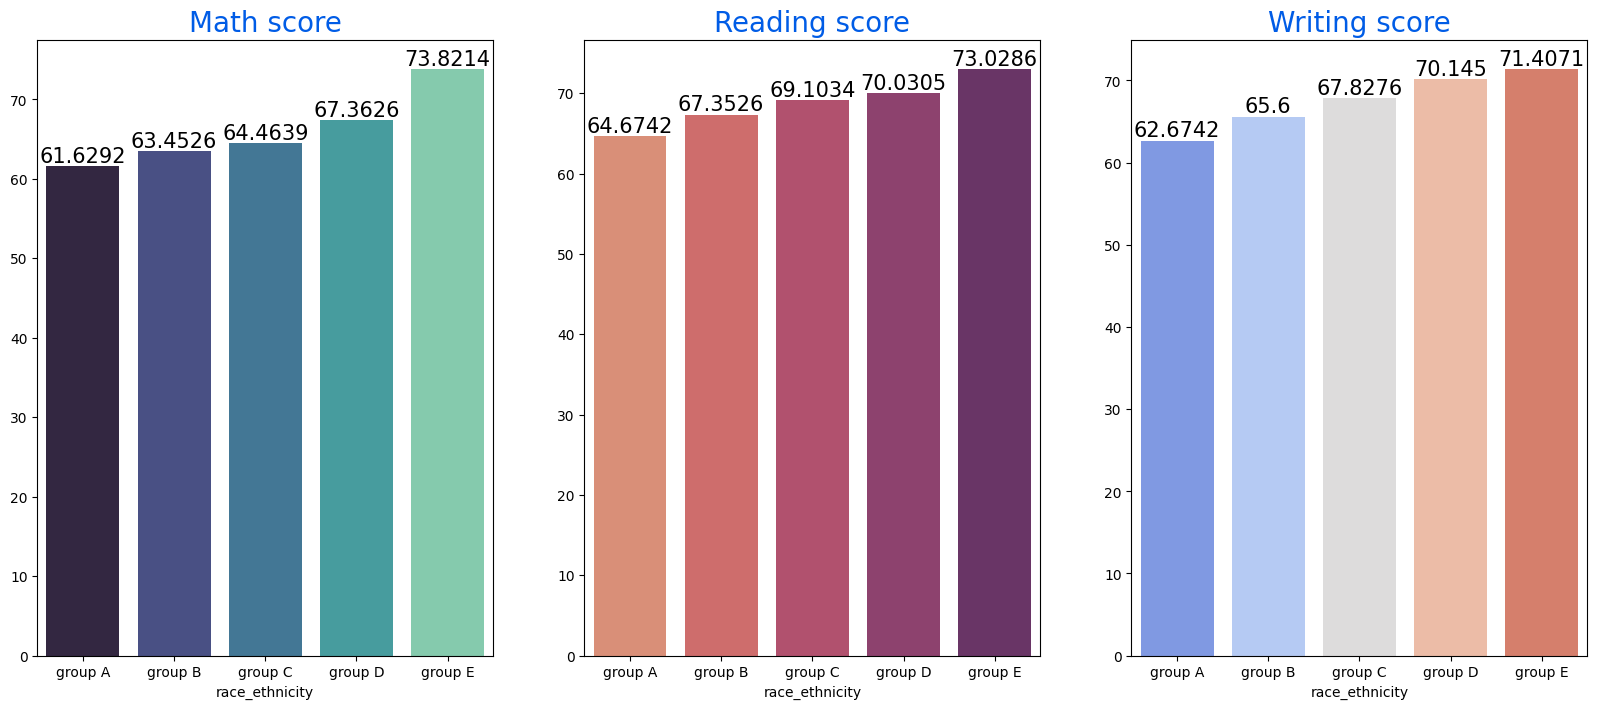

In [71]:
# Bivariate Analysis
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

**4.4.3 Parental Level of Education**

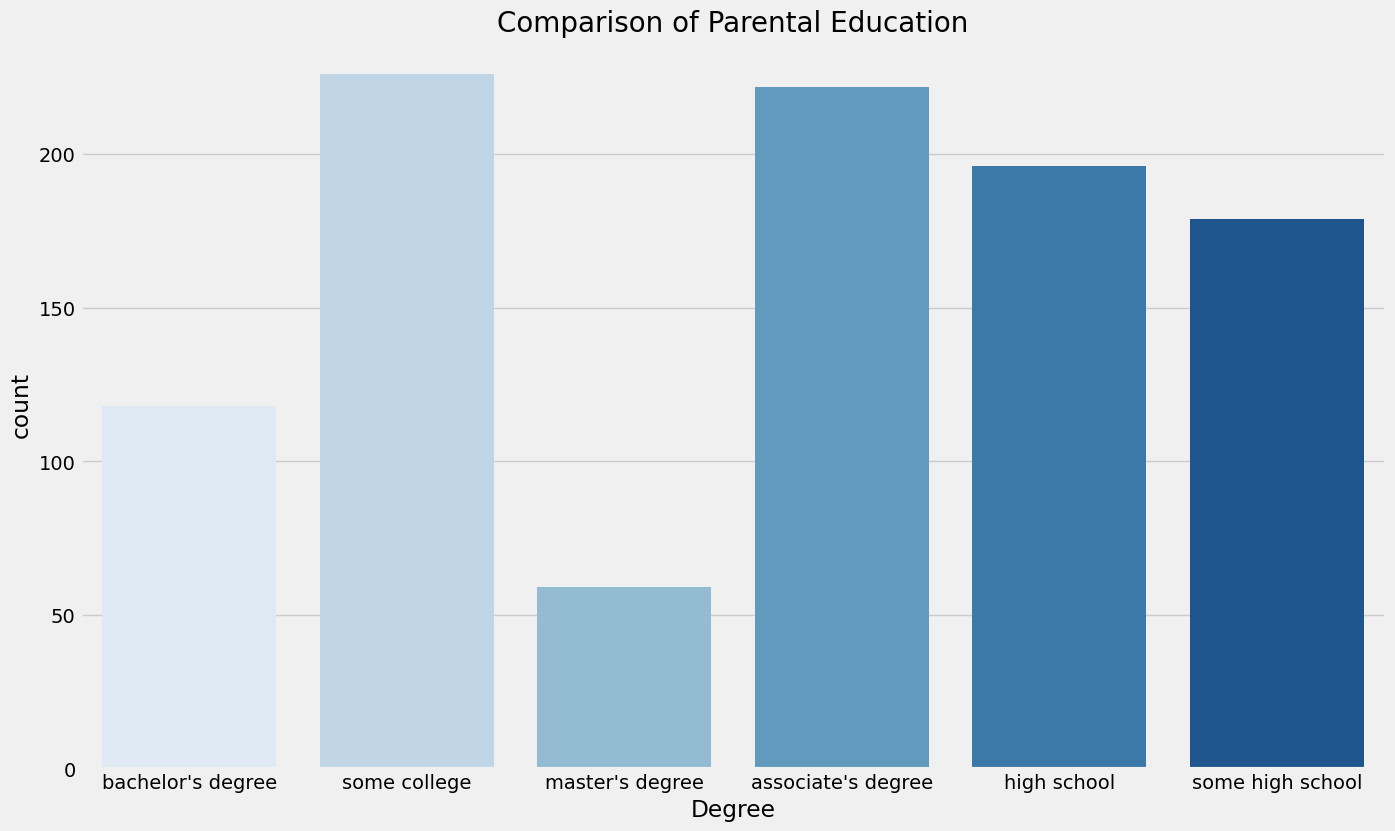

In [76]:
# Univariate Analysis
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x = df['parental_level_of_education'], palette = 'Blues',data = df)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights
* Largest number of parents are from some college.

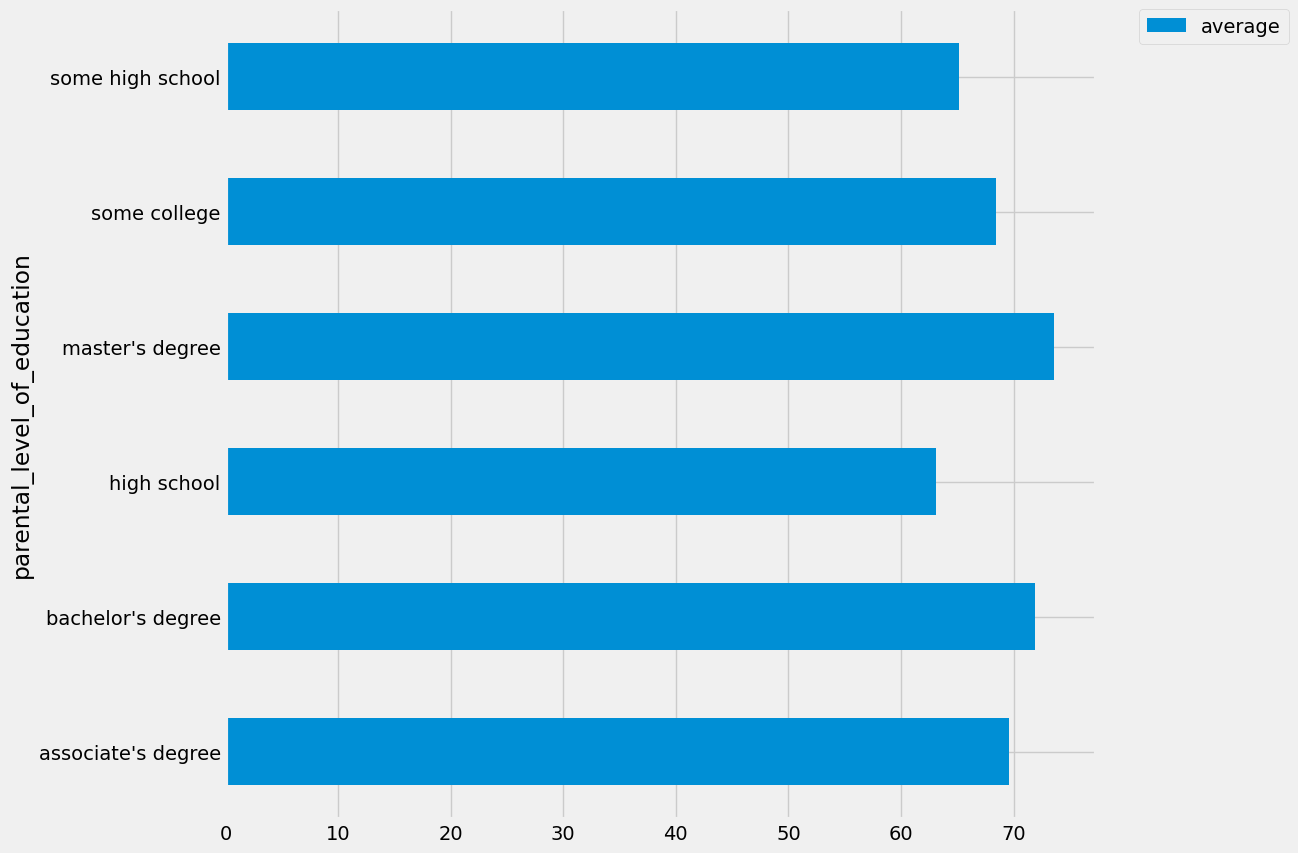

In [78]:
# Bivariate Analysis

df.groupby('parental_level_of_education')['average'].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Insights
* The score of student whose parents possess master and bachelor level education are higher than others.

**4.4.4. Lunch**

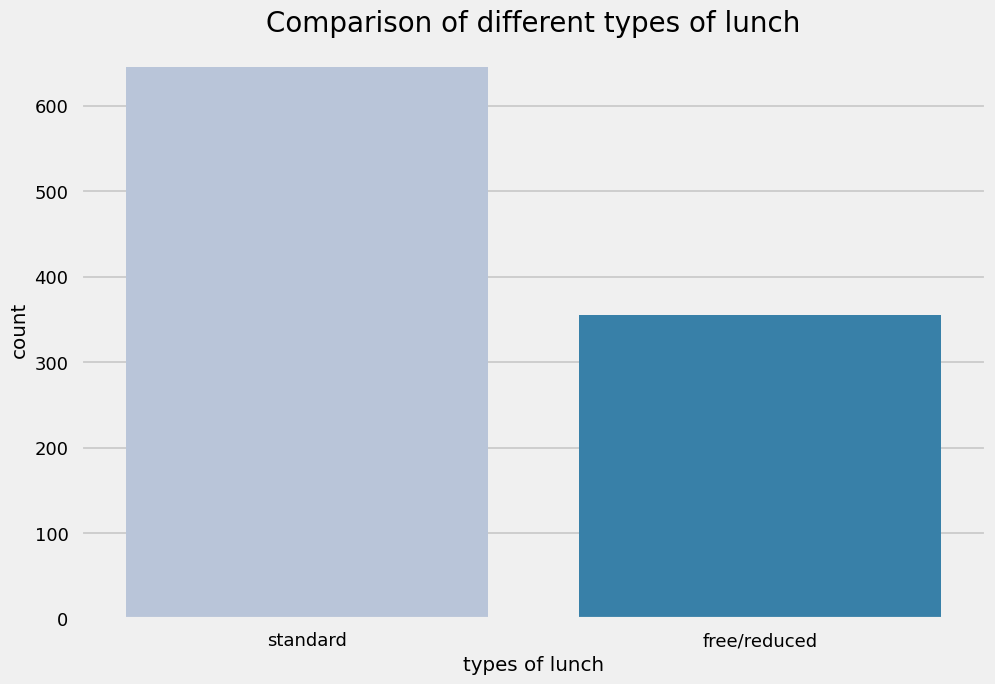

In [80]:
# Univariate Analysis
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x =df['lunch'],data = df, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Insights
* Students being served Standard lunch was more than free lunch

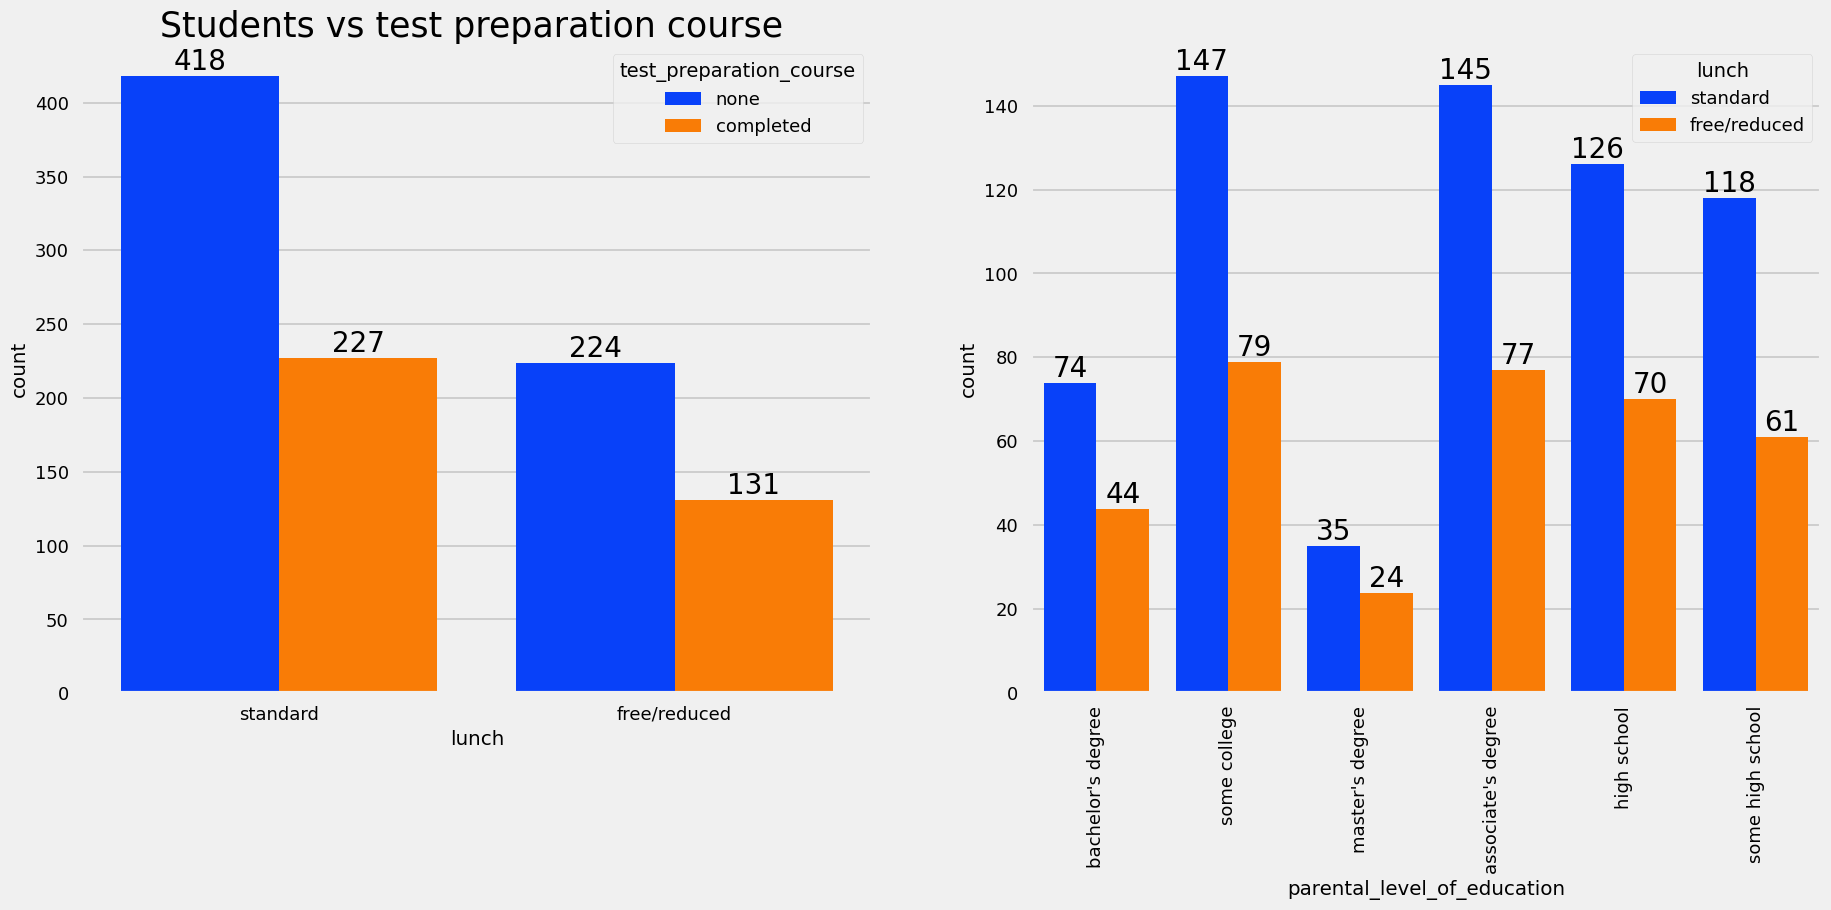

In [85]:
# Bivariate Analysis
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
plt.xticks(rotation=90)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

### Insights
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

**4.4.5 Test Preparation Course Column**

<Axes: xlabel='lunch', ylabel='writing_score'>

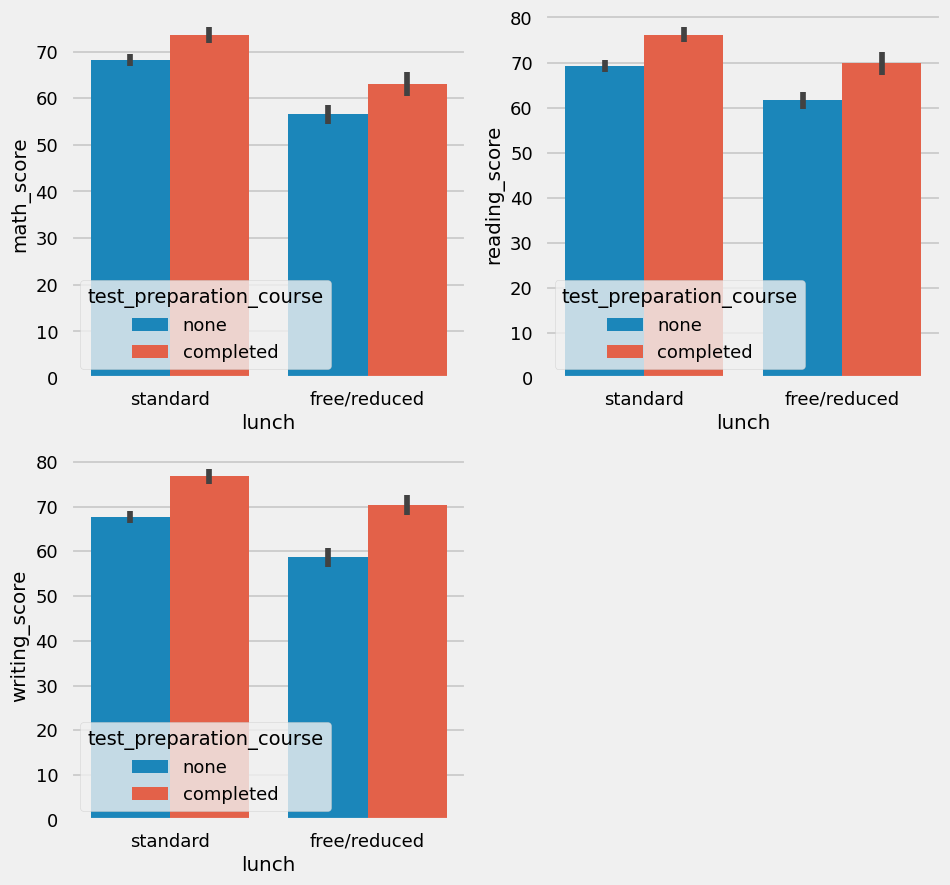

In [89]:
# bivariate analysis
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

### Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

**4.4.6 Checking Outliers**

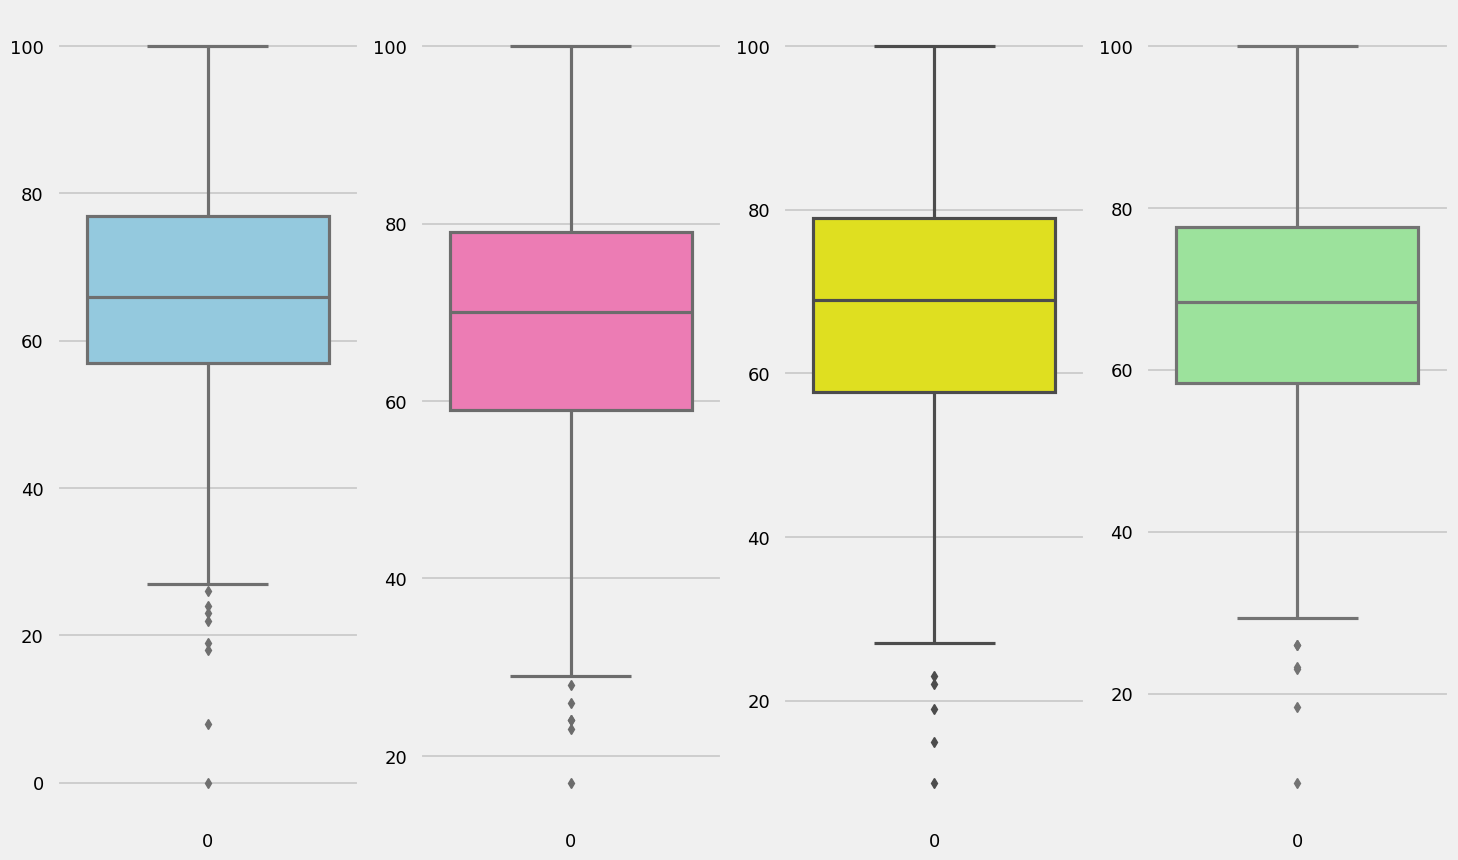

In [91]:
plt.subplots(1,4,figsize=(16,10))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

**4.4.7 Multivariate Analysis using pairplot**

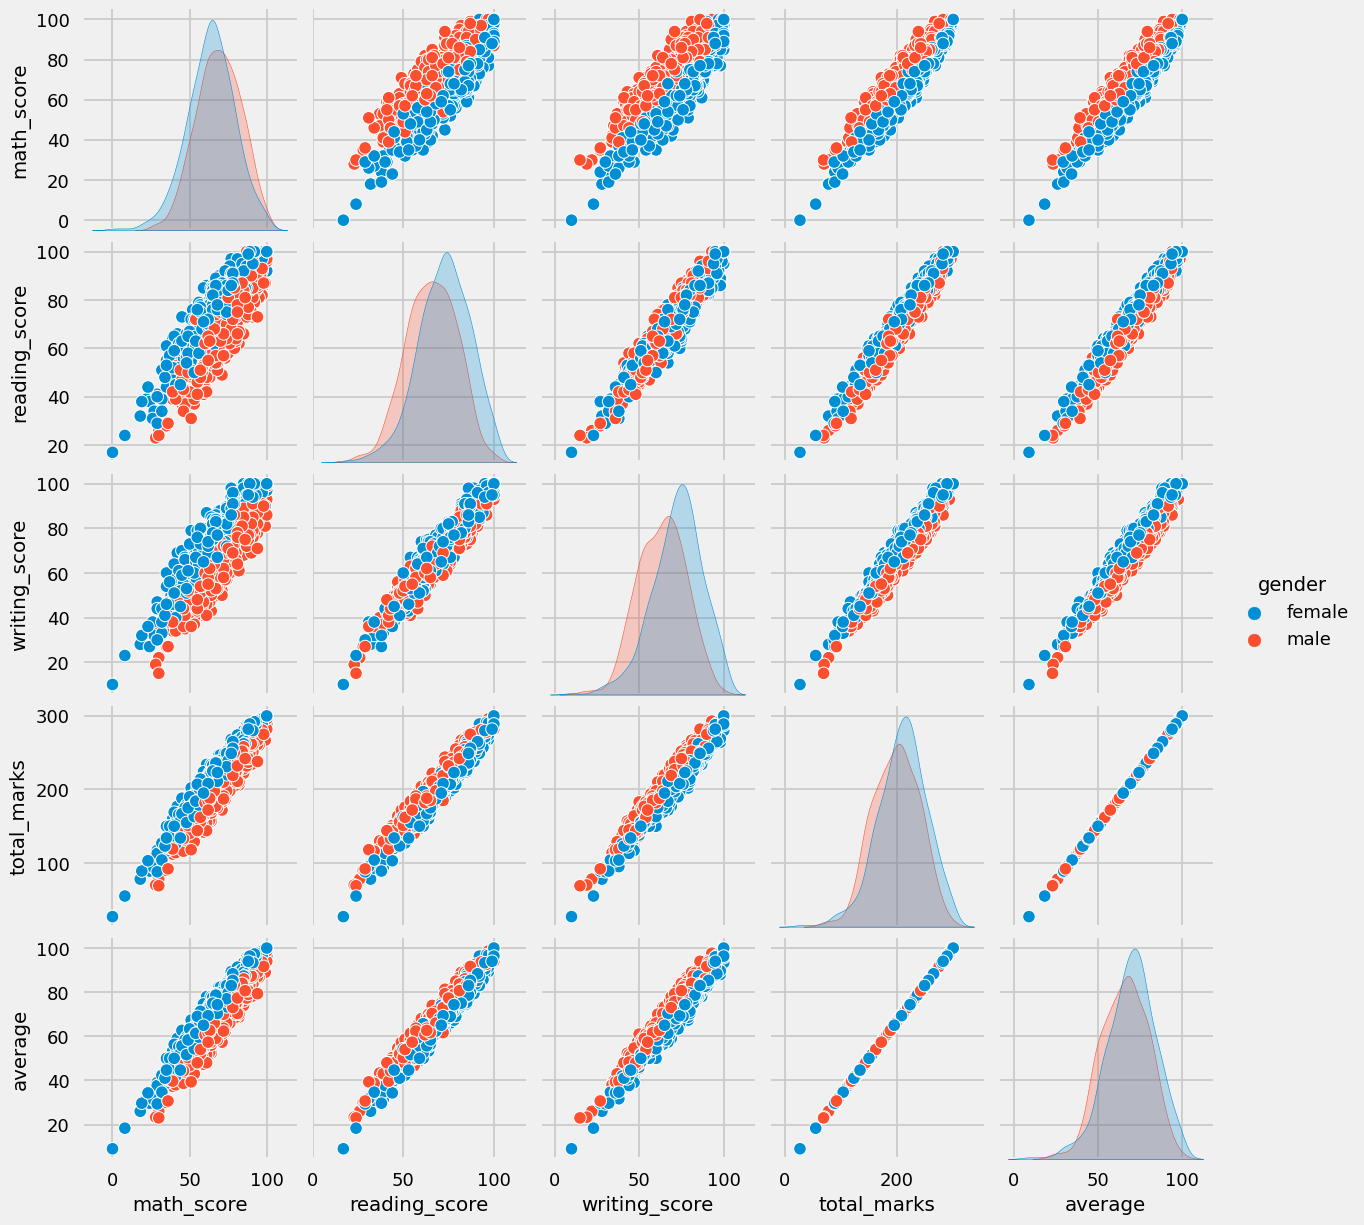

In [92]:
sns.pairplot(df,hue='gender')
plt.show()

### Insights
* From the above plot it is clear that all the scores increase linearly with each other.

## 5. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.